In [2]:
import pandas as pd
import numpy as np
import cobra
from cobra import Model, Reaction, Metabolite
from cobra.io import load_matlab_model, write_sbml_model
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from scipy import stats
from scipy.interpolate import interp1d
warnings.filterwarnings('ignore', '.*do not.*', )
warnings.warn('DelftStack')
warnings.warn('Do not show this message')
import requests
import time

from scipy.stats import mannwhitneyu 

/tmp/ipykernel_131663/3091933566.py:12: UserWarning: DelftStack
  warnings.warn('DelftStack')


Figure 1D

In [3]:
#data
folder="/home/bguzman/jupyter/UI/YMC/results/"
T1= pd.read_csv(folder+"predictions_jan27_with_vo2/T1_Solve_Succeeded.csv", sep="\t",index_col=0,names=["flux"], header=None,skiprows=1)
T2= pd.read_csv(folder+"predictions_jan27_with_vo2/T2_Solve_Succeeded.csv",sep="\t",index_col=0,names=["flux"], header=None,skiprows=1)
T3= pd.read_csv(folder+"predictions_jan27_with_vo2/T3_Solve_Succeeded.csv" ,sep="\t",index_col=0,names=["flux"], header=None,skiprows=1)
T4= pd.read_csv(folder+"predictions_jan27_with_vo2/T4_Solve_Succeeded.csv",sep="\t",index_col=0,names=["flux"], header=None,skiprows=1)
T5= pd.read_csv(folder+"predictions_jan27_with_vo2/T5_Solve_Succeeded.csv", sep="\t",index_col=0,names=["flux"], header=None,skiprows=1)
T6= pd.read_csv(folder+"predictions_jan27_with_vo2/T6_Solve_Succeeded.csv", sep="\t",index_col=0,names=["flux"], header=None,skiprows=1)
T7= pd.read_csv(folder+"predictions_jan27_with_vo2/T7_Solve_Succeeded.csv", sep="\t",index_col=0,names=["flux"], header=None,skiprows=1)
T8= pd.read_csv(folder+"predictions_jan27_with_vo2/T8_Solve_Succeeded.csv", sep="\t",index_col=0,names=["flux"], header=None,skiprows=1)
T9= pd.read_csv(folder+"predictions_jan27_with_vo2/T9_Solve_Succeeded.csv", sep="\t",index_col=0,names=["flux"], header=None,skiprows=1)
T10= pd.read_csv(folder+"predictions_jan27_with_vo2/T10_Solve_Succeeded.csv",sep="\t",index_col=0,names=["flux"], header=None,skiprows=1)
T11= pd.read_csv(folder+"predictions_jan27_with_vo2/T11_Solve_Succeeded.csv",sep="\t",index_col=0,names=["flux"], header=None,skiprows=1)
T12= pd.read_csv(folder+"predictions_jan27_with_vo2/T12_Solve_Succeeded.csv",sep="\t",index_col=0,names=["flux"], header=None,skiprows=1)
T13= pd.read_csv(folder+"predictions_jan27_with_vo2/T13_Solve_Succeeded.csv",sep="\t",index_col=0,names=["flux"], header=None,skiprows=1)
T14= pd.read_csv(folder+"predictions_jan27_with_vo2/T14_Solve_Succeeded.csv",sep="\t",index_col=0,names=["flux"], header=None,skiprows=1)
T15= pd.read_csv(folder+"predictions_jan27_with_vo2/T15_Solve_Succeeded.csv",sep="\t",index_col=0,names=["flux"], header=None,skiprows=1)
T16=pd.read_csv(folder+"predictions_jan27_with_vo2/T16_Solve_Succeeded.csv",sep="\t",index_col=0,names=["flux"], header=None,skiprows=1)

allFluxes=pd.DataFrame()
index=0
for i in [T1,T2,T3,T4,T5,T6,T7,T8,T9,T10,T11,T12,T13,T14,T15,T16]:
    index += 1
    allFluxes["T"+str(index)]=i["flux"]#*10000

In [4]:
#allFluxes.to_csv("allFluxes.csv")

In [5]:
#load model
model= cobra.io.read_sbml_model("/home/bguzman/jupyter/UI/YMC/gems/iMM904.xml")


Scaling...
 A: min|aij| =  1.000e+00  max|aij| =  1.000e+00  ratio =  1.000e+00
Problem data seem to be well scaled


In [6]:
##############################################################################
## Load json file and iMM904 GEM
import cobra
json_annotations = requests.get('http://bigg.ucsd.edu/static/models/iMM904.json').json()
model = cobra.io.read_sbml_model("/home/bguzman/jupyter/UI/YMC/gems/iMM904.xml")

In [7]:
##############################################################################
## extract subsystem for each reaction
subsystems_list = set()
for i in range(len(model.reactions)):
    annotation = json_annotations['reactions'][i]
    subsystems_list.add(annotation['subsystem'])

##############################################################################
## assigns the reactions to their respective subsystem
subsystems = {}
for subsyst in subsystems_list:
    subsystems[subsyst] = set()
    for i in range(len(model.reactions)):
        subsystem = json_annotations['reactions'][i]['subsystem']
        if subsyst == subsystem:
            ID = 'R_'+json_annotations['reactions'][i]['id']
            subsystems[subsyst].add(ID)

In [22]:
subsystems

{'S_Starch_and_Sucrose_Metabolism': {'R_13BGH', 'R_13BGHe'},
 'S_Valine__Leucine__and_Isoleucine_Metabolism': {'R_ACHBSm',
  'R_ACLSm',
  'R_DHAD1m',
  'R_DHAD2m',
  'R_ILETA',
  'R_ILETAm',
  'R_IPMD',
  'R_IPPMIa',
  'R_IPPMIb',
  'R_IPPS',
  'R_IPPSm',
  'R_KARA1im',
  'R_KARA2im',
  'R_LEUTA',
  'R_LEUTAm',
  'R_OMCDC',
  'R_OMCDCm',
  'R_VALTA',
  'R_VALTAim'},
 'S_Methionine_Metabolism': {'R_ADMDC',
  'R_AHCi',
  'R_AHSERL',
  'R_AHSERL2',
  'R_CYSTGL',
  'R_CYSTL',
  'R_CYSTLp',
  'R_DIPS',
  'R_DKMPPD2',
  'R_HSERTA',
  'R_MDRPD',
  'R_METAT',
  'R_METB1',
  'R_METS',
  'R_MHPGLUT',
  'R_MTAP',
  'R_MTRI',
  'R_SHSL1',
  'R_SHSL4r',
  'R_UNK3'},
 'S_Arginine_and_Proline_Metabolism': {'R_4HGLSDm',
  'R_ACGKm',
  'R_ACGSm',
  'R_ACOTAim',
  'R_AGPRim',
  'R_AMID',
  'R_ARGN',
  'R_ARGSL',
  'R_ARGSS',
  'R_CBPS',
  'R_DXHPScm',
  'R_EHGLAT',
  'R_EHGLATm',
  'R_EHGLATp',
  'R_G5SADrm',
  'R_G5SADs',
  'R_G5SD',
  'R_G5SD2',
  'R_GLU5K',
  'R_HPROa',
  'R_HPROb',
  'R_HPROxm',
  '

In [9]:
#df normalization
allFluxes_norm=allFluxes.apply(lambda x: (x-x.mean())/x.std(), axis = 1)

#NAN -> 0
allFluxes_norm=allFluxes_norm.fillna(0)


In [23]:
#Integrate pathways and reactions values
results=allFluxes
time1 = time.time()

pathways = pd.DataFrame(columns=results.columns, index=subsystems.keys())
for i, pathway in enumerate(pathways.index):
    print(pathway, "\t(",i+1,"/",len(pathways.index),")")
    for j, sample in enumerate(pathways.columns):
#         print (" - ",sample, "\t[",j+1,"/",len(pathways.columns),"]", "\t(",i+1,"/",len(pathways.index),")")
        v_path = []
        for rxn in subsystems[pathway]:
#            print(rxn)
            v = abs(results[sample].loc[rxn])
            v_path.append(v)
#       Pathways mean            
        v_mean_path = np.sum(v_path) #/ len(v_path)
        
        pathways[sample].loc[pathway] = v_mean_path
        
#         break
        
        
#     break

time2 = time.time()
print("Time:", (time2-time1)/60, "min")

S_Starch_and_Sucrose_Metabolism 	( 1 / 60 )
S_Valine__Leucine__and_Isoleucine_Metabolism 	( 2 / 60 )
S_Methionine_Metabolism 	( 3 / 60 )
S_Arginine_and_Proline_Metabolism 	( 4 / 60 )
S_Oxidative_Phosphorylation 	( 5 / 60 )
S_Porphyrin_and_Chlorophyll_Metabolism 	( 6 / 60 )
S_Purine_and_Pyrimidine_Biosynthesis 	( 7 / 60 )
S_Transport__Vacuolar 	( 8 / 60 )
S_Quinone_Biosynthesis 	( 9 / 60 )
S_Citric_Acid_Cycle 	( 10 / 60 )
S_Galactose_metabolism 	( 11 / 60 )
S_Phospholipid_Biosynthesis 	( 12 / 60 )
S_Glutamate_metabolism 	( 13 / 60 )
S_Sterol_Metabolism 	( 14 / 60 )
S_Tyrosine__Tryptophan__and_Phenylalanine_Metabolism 	( 15 / 60 )
S_Glycerolipid_Metabolism 	( 16 / 60 )
S_Nitrogen_Metabolism 	( 17 / 60 )
S_Pyridoxine_Metabolism 	( 18 / 60 )
S_Pentose_Phosphate_Pathway 	( 19 / 60 )
S_Fatty_Acid_Metabolism 	( 20 / 60 )
S_Thiamine_Metabolism 	( 21 / 60 )
S_Threonine_and_Lysine_Metabolism 	( 22 / 60 )
S_Xylose_Metabolism 	( 23 / 60 )
Biomass and maintenance functions 	( 24 / 60 )
S_Alanine_an

In [24]:
pathways

,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10,T11,T12,T13,T14,T15,T16
S_Starch_and_Sucrose_Metabolism,1.421403,1.133561,0.736224,0.827962,1.170313,0.658388,1.073916,0.811521,0.750692,0.700688,1.046704,1.005296,1.236514,1.010352,1.490533,1.679392
S_Valine__Leucine__and_Isoleucine_Metabolism,234.443795,244.85179,233.402397,305.579516,273.313307,255.640944,260.348837,258.846487,252.865224,266.020031,263.190093,260.909442,322.715218,249.707763,242.597291,255.865177
S_Methionine_Metabolism,217.8643,259.890253,372.995679,352.644736,493.620965,357.634891,318.637407,311.24543,297.0703,302.405728,164.53637,626.745617,481.678453,419.912035,407.214709,425.610814
S_Arginine_and_Proline_Metabolism,205.889192,195.561819,194.595485,191.560108,198.399458,223.391659,202.297105,184.203903,223.79107,241.777592,305.843743,302.312089,265.65097,175.512598,211.107368,219.426753
S_Oxidative_Phosphorylation,797.92594,747.660209,691.2515,758.113604,785.490103,999.890259,1027.658452,1029.336557,1057.991716,835.273902,888.897983,1112.48319,996.301321,352.601836,905.501474,890.0045
S_Porphyrin_and_Chlorophyll_Metabolism,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
S_Purine_and_Pyrimidine_Biosynthesis,100.61069,108.718891,120.173066,141.117683,153.008058,132.021078,139.700139,77.007573,77.974659,111.87296,116.922946,86.128803,174.585079,88.642406,90.34454,86.904002
S_Transport__Vacuolar,16.855011,17.706635,12.187222,12.720922,19.569215,14.467547,13.425353,14.910919,10.817695,14.998002,14.274823,22.090172,19.579901,24.556236,27.086812,24.30447
S_Quinone_Biosynthesis,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
S_Citric_Acid_Cycle,163.958827,159.496956,149.880609,153.22178,157.171441,195.869812,212.518634,190.202655,205.021773,157.772225,195.571007,231.935928,223.551888,74.821959,192.714674,182.719351


In [31]:
#pathways.iloc[1,0:]

In [26]:
#Sacar promedio entre los diferentes elementos de los tiempos involucrados en RC
reactions=list(pathways.index)
mean_RC=list((pathways["T1"] + pathways["T2"] + pathways["T13"] + pathways["T14"] + pathways["T15"] + pathways["T16"])/6)
mean_OX=list((pathways["T3"] + pathways["T4"] + pathways["T5"])/3)
mean_RB=list((pathways["T6"] + pathways["T7"] + pathways["T8"] + pathways["T9"] + pathways["T10"] + pathways["T11"] + pathways["T12"])/7)
mean_pathways= pd.DataFrame(list(zip(reactions,mean_RC,mean_OX,mean_RB)), columns = ['Reactions','RC flux','OX flux','RB flux'])
mean_pathways

,Reactions,RC flux,OX flux,RB flux
0,S_Starch_and_Sucrose_Metabolism,1.328626e+00,9.114998e-01,8.638864e-01
1,S_Valine__Leucine__and_Isoleucine_Metabolism,2.583635e+02,2.707651e+02,2.596887e+02
2,S_Methionine_Metabolism,3.686951e+02,4.064205e+02,3.397537e+02
3,S_Arginine_and_Proline_Metabolism,2.121914e+02,1.948517e+02,2.405167e+02
4,S_Oxidative_Phosphorylation,7.816659e+02,7.449517e+02,9.930760e+02
5,S_Porphyrin_and_Chlorophyll_Metabolism,9.567673e-09,9.551987e-09,9.511041e-09
6,S_Purine_and_Pyrimidine_Biosynthesis,1.083009e+02,1.380996e+02,1.059469e+02
7,S_Transport__Vacuolar,2.168151e+01,1.482579e+01,1.499779e+01
8,S_Quinone_Biosynthesis,5.023103e-08,5.600060e-08,5.762185e-08
9,S_Citric_Acid_Cycle,1.662106e+02,1.534246e+02,1.984131e+02


In [27]:
mean_pathways.iloc[0,0:]

Reactions    S_Starch_and_Sucrose_Metabolism
RC flux                             1.328626
OX flux                               0.9115
RB flux                             0.863886
Name: 0, dtype: object

In [28]:
GG=[] #'S_GlycolysisGluconeogenesis'
OXP=[] #'S_Oxidative_Phosphorylation'
PM=[] #'S_Pyruvate_Metabolism'
GM=[] #'S_Glutamate_metabolism'
AAM=[] #'S_Alanine_and_Aspartate_Metabolism'
FAB=[] #'S_Fatty_Acid__Biosynthesis'
TCA=[] #'S_Citric_Acid_Cycle'
TM=[] #'S_Transport__Mitochondrial'
NAD=[] #'S_NAD_Biosynthesis'
PP=[] #'S_Pentose_Phosphate_Pathway'

list_path=["GG","OXP","PM","AAM","GM","FAB","TCA","NAD","PP","TM"]

i=0
j=0
for i in range(len(mean_pathways)):
    for j in pathways.index:
        if j=="S_GlycolysisGluconeogenesis":
            GG.append(list(mean_pathways.iloc[i,0:]))
        elif j=="S_Oxidative_Phosphorylation":
            OXP.append(list(mean_pathways.iloc[i,0:]))
        elif j=="S_Pyruvate_Metabolism":
            PM.append(list(mean_pathways.iloc[i,0:]))
        elif j=="S_Alanine_and_Aspartate_Metabolism":
            AAM.append(list(mean_pathways.iloc[i,0:]))
        elif j=="S_Glutamate_metabolism":
            GM.append(list(mean_pathways.iloc[i,0:]))
        elif j=="S_Fatty_Acid__Biosynthesis":
            FAB.append(list(mean_pathways.iloc[i,0:]))
        elif j=="S_Citric_Acid_Cycle":
            TCA.append(list(mean_pathways.iloc[i,0:]))
        elif j=="S_NAD_Biosynthesis":
            NAD.append(list(mean_pathways.iloc[i,0:]))
        elif j=="S_Pentose_Phosphate_Pathway":
            PP.append(list(mean_pathways.iloc[i,0:]))
        elif j=="S_Transport__Mitochondrial":
            TM.append(list(mean_pathways.iloc[i,0:]))
        else:
            print("Loading")
        i+=1
            
    break


Loading
Loading
Loading
Loading
Loading
Loading
Loading
Loading
Loading
Loading
Loading
Loading
Loading
Loading
Loading
Loading
Loading
Loading
Loading
Loading
Loading
Loading
Loading
Loading
Loading
Loading
Loading
Loading
Loading
Loading
Loading
Loading
Loading
Loading
Loading
Loading
Loading
Loading
Loading
Loading
Loading
Loading
Loading
Loading
Loading
Loading
Loading
Loading
Loading
Loading


In [29]:
OXP

[['S_Oxidative_Phosphorylation',
  781.6658800985487,
  744.951735581738,
  993.0760084818995]]

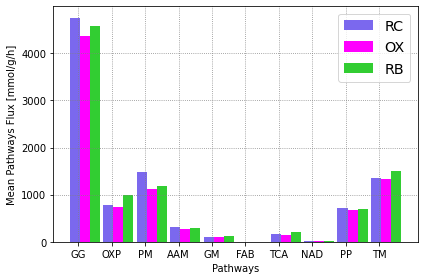

In [30]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

RC_means = [GG[0][1], OXP[0][1], PM[0][1], AAM[0][1], GM[0][1], FAB[0][1], TCA[0][1], NAD[0][1], PP[0][1], TM[0][1]]
OX_means = [GG[0][2], OXP[0][2], PM[0][2], AAM[0][2], GM[0][2], FAB[0][2], TCA[0][2], NAD[0][2], PP[0][2], TM[0][2]]
RB_means = [GG[0][3], OXP[0][3], PM[0][3], AAM[0][3], GM[0][3], FAB[0][3], TCA[0][3], NAD[0][3], PP[0][3], TM[0][3]]

x = np.arange(len(list_path))
#tamaño de cada barra
width = 0.30

fig, ax = plt.subplots()

#Generamos las barras para el conjunto1
rects1 = ax.bar(x - width/3, RC_means, width, label='RC',color='mediumslateblue')
#Generamos las barras para el conjunto3
rects2 = ax.bar(x + 0.2, OX_means, width, label='OX',color='magenta')
#Generamos las barras para el conjunto3
rects3 = ax.bar(x + 0.5, RB_means, width, label='RB',color='limegreen')

#Añadimos las etiquetas de identificacion de valores en el grafico
ax.set_ylabel('Mean Pathways Flux [mmol/g/h]')
ax.set_xlabel('Pathways')
#ax.set_title('Yeast Metabolic Cycle')
ax.set_xticks(x)
ax.set_xticklabels(list_path)
#Añadimos un legen() esto permite mmostrar con colores a que pertence cada valor.
ax.legend()

        
#Añadimos las etiquetas para cada barra
plt.legend(fontsize="x-large")
fig.tight_layout()
plt.grid(color='grey',linestyle='dotted')
plt.savefig('Fig1D.pdf')
#plt.show()
        